# Regression

-----------------

## Exercise - Use simple linear regression on the `Auto` data set.

1. Use `statsmodels` or `scikit-learn` to perform a simple linear regression with
`mpg` as the response and `horsepower` as the predictor. Print the results. Comment on the output.
For example:
    - Is there a relationship between the predictor and the response?
    - How strong is the relationship between the predictor and the response?
    - Is the relationship between the predictor and the response positive or negative?
    - What is the predicted `mpg` associated with a `horsepower` of 98? *Optional: What are the associated 95% confidence and prediction intervals?*

2. Plot the response and the predictor. Plot the least squares regression line.

3. Produce [diagnostic plots](http://data.library.virginia.edu/diagnostic-plots/) of the least squares regression fit. Comment on any problems you see with the fit.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
% matplotlib inline

In [2]:
auto_data = pd.read_csv('Auto.csv')

In [3]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
lm = smf.ols('mpg ~ horsepower', data=auto_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 09 Jul 2017   Prob (F-statistic):           7.03e-81
Time:                        21:45:25   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Horsepower does not really seem to be very highly correlated with mpg - R2 is 0.606. The relationship is negative - the higher the horsepower, the lower the MPG generally.

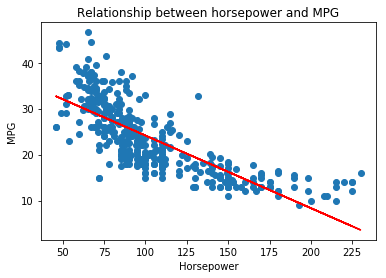

In [5]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(auto_data.mpg, auto_data.horsepower)
plt.scatter(auto_data.horsepower, auto_data.mpg)
plt.plot(auto_data.horsepower, lm.fittedvalues, color='r')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Relationship between horsepower and MPG')
plt.show()

In [12]:
# generating residuals
predictions = lm.predict(auto_data.horsepower)
auto_residuals = auto_data.mpg - predictions

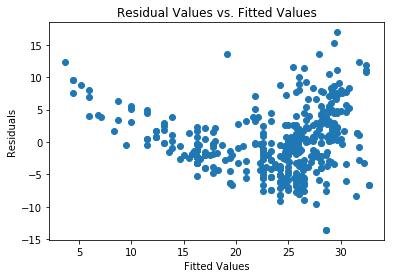

In [14]:
plt.scatter(lm.fittedvalues, auto_residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Values vs. Fitted Values")
plt.show()

Looks to potentially be a parabolic trend here, and that a linear fit model may not be the best for this relationship

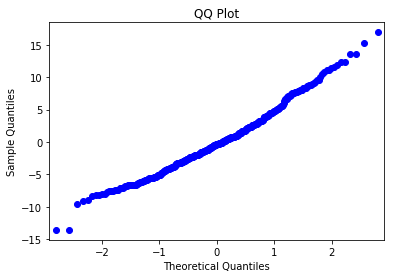

In [18]:
import statsmodels.api as sm
sm.qqplot(auto_residuals)
plt.title("QQ Plot")
plt.show()

Although there are some lower outliers, it seems that the data is largely normally distributed. Prediction may be off on the low end due to MPG being unable to dip below a particular point (no one will buy cars at 0 MPG). The lowest MPG given was 9.

In [24]:
import math
std_res = auto_residuals.apply(lambda x: math.sqrt(abs(x)))

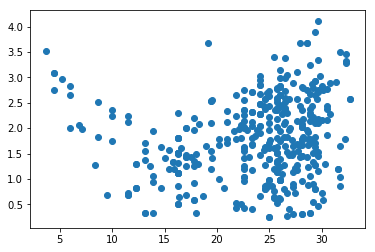

In [26]:
plt.scatter(lm.fittedvalues, std_res)

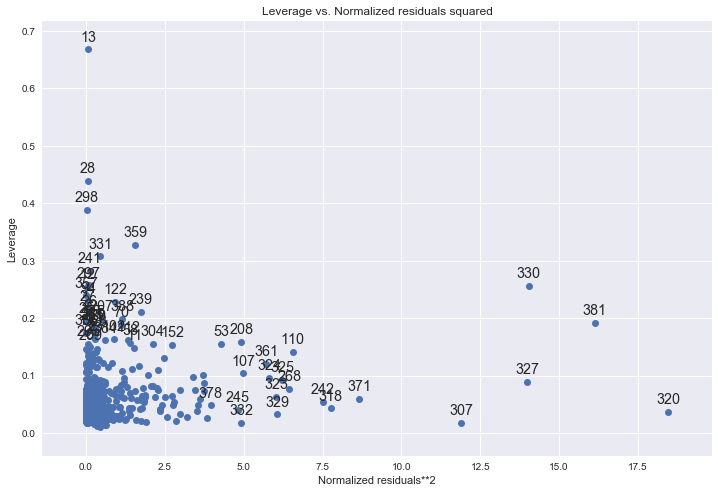

In [449]:
import statsmodels as stats
fig, ax = plt.subplots(figsize=(12,8))
fig = stats.graphics.regressionplots.plot_leverage_resid2(lm, ax=ax)

## Exercise - Use multiple linear regression on the `Auto` data set.

1. Produce a scatterplot matrix which includes all of the variables
in the data set.

2. Compute the matrix of correlations between the variables using
the function corr(). Plot a matrix correlation heatmap as well.

3. Perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Print the results. Comment on the output. For instance:
    - Is there a relationship between the predictors and the response?
    - Which predictors appear to have a statistically significant relationship to the response?
    - What does the coefficient for the year variable suggest?
4. Produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

5. Use the - and + symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?

6. Try a few different transformations of the variables, such as
$log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

1) Produce a scatterplot matrix which includes all of the variables in the data set.

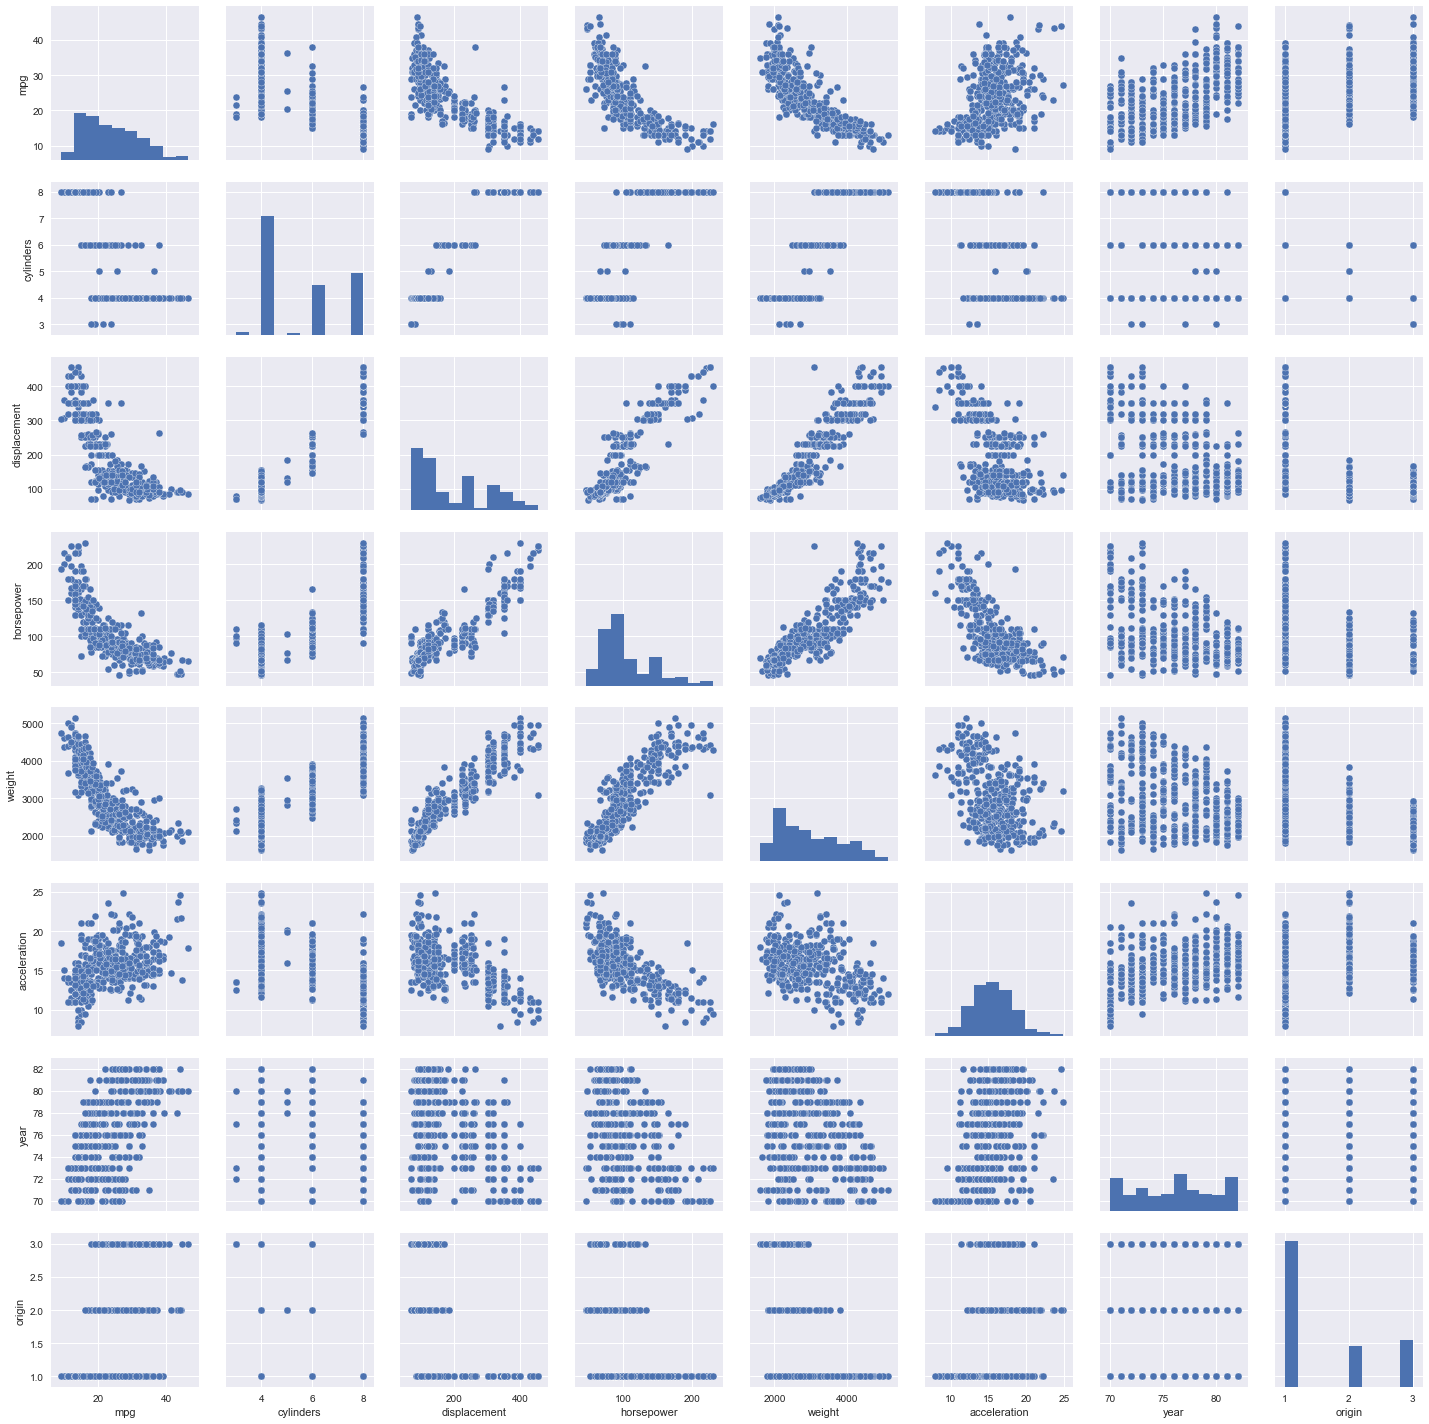

In [43]:
import seaborn as sns
sns.pairplot(auto_data)

2) Compute the matrix of correlations between the variables using the function corr(). Plot a matrix correlation heatmap as well.

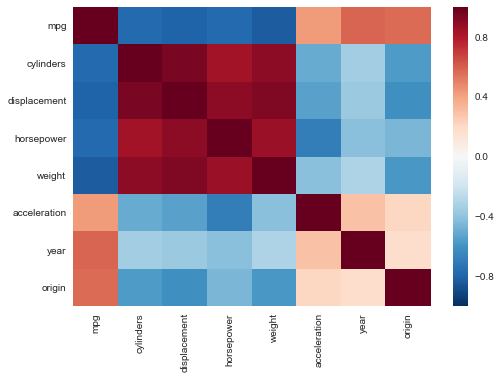

In [44]:
corr_mat = auto_data.corr()
sns.heatmap(corr_mat)

In [45]:
corr_mat

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


3) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Print the results. Comment on the output.
- Is there a relationship between the predictors and the response?
- Which predictors appear to have a statistically significant relationship to the response?
- What does the coefficient for the year variable suggest?

In [46]:
mlm = smf.ols('mpg ~ horsepower + cylinders + displacement + weight + acceleration + year + origin', data=auto_data).fit()
mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          2.04e-139
Time:                        01:03:00   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

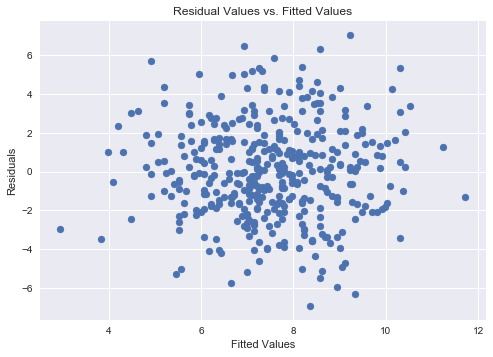

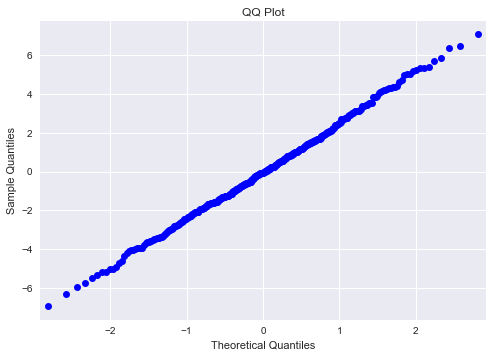

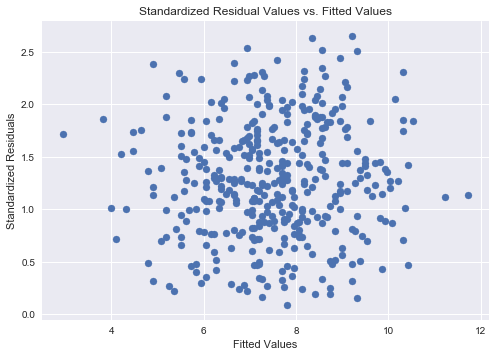

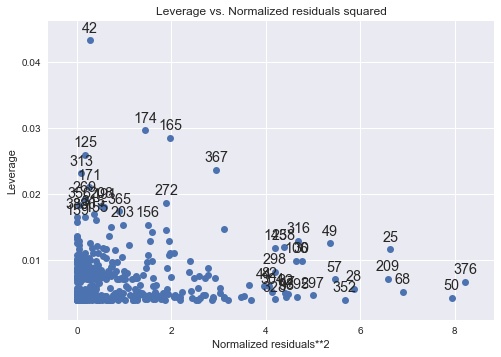

In [452]:
plt.scatter(mlm.fittedvalues, mlm.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Values vs. Fitted Values")
plt.show()

sm.qqplot(mlm.resid)
plt.title("QQ Plot")
plt.show()

std_res = mlm.resid.apply(lambda x: math.sqrt(abs(x)))
plt.scatter(mlm.fittedvalues, std_res)
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residual Values vs. Fitted Values")
plt.show()

stats.graphics.regressionplots.plot_leverage_resid2(mlm)
plt.show()

42 seems to be an outlying leverage. Otherwise, residuals vs. fitted values seems to indicate some outliers, but they would be difficult to identify.

5) Use the - and + symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [78]:
from itertools import combinations

int_form = ' + '.join([x[0] + ' * ' + x[1] for x in combinations(auto_data.columns[1:-1], 2)])
total_form = 'mpg ~ ' + ' + '.join(auto_data.columns[1:-1]) + ' + ' + int_form
total_form

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin'

In [79]:
lm = smf.ols(total_form, data=auto_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          4.01e-155
Time:                        03:07:08   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

6) Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

In [445]:
form_list = ['mpg ~ np.log(auto_data.horsepower)', 'mpg ~ np.sqrt(auto_data.horsepower)', 'mpg ~ np.power(auto_data.horsepower, 2)']

In [447]:
for form in form_list:
    results = smf.ols(form, data=auto_data).fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.70e-95
Time:                        14:16:54   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

All tranformations are statistically significant, but all have much lower r squared values than the original fit, so a linear relationship seems to be the best fit of all the tranformations performed.

## Exercise - Use multiple regression using the `Carseats` data set.

1. Fit a multiple regression model to predict `Sales` using `Price`,
`Urban`, and `US`.

2. Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

3. Write out the model in equation form, being careful to handle
the qualitative variables properly.

4. For which of the predictors can you reject the null hypothesis
H: β = 0?

5. On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

6. How well do the models in (1) and (5) fit the data?

7. Using the model from (5), obtain 95% confidence intervals for
the coefficient(s).

8. Is there evidence of outliers or high leverage observations in the
model from (5)?

In [81]:
carseats_data = pd.read_csv('Carseats.csv')
carseats_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


1) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [83]:
form = 'Sales ~ Price + Urban + US'
mlm = smf.ols(form, data=carseats_data).fit()
mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           2.39e-23
Time:                        03:10:51   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

For each increase in Price, sales drop by 5.45%

Sales in the US are 120% higher than elsewhere.

Sales in urban locations are 2.19% lower than elsewhere.

3) Write out the model in equation form, being careful to handle the qualitative variables properly.

For sales in the US and an urban place:

Sales = (-.0219 \* Price) + (1.2006 \* Price) + (-0.0545 \* Price) + 13.0435 + 0.651

For sales outside the US and an urban place:

Sales = (-.0219 \* Price) + (-0.0545 \* Price) + 13.0435 + 0.651

For sales in the US and not in an urban place:

Sales = (1.2006 \* Price) + (-0.0545 \* Price) + 13.0435 + 0.651

For sales outside the US and not in an urban place:

Sales = (-.0219 \* Price) + (1.2006 \* Price) + (-0.0545 \* Price) + 13.0435 + 0.651

4) For which of the predictors can you reject the null hypothesis H: β = 0?

US and Price (low p-values)

5) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [85]:
form = 'Sales ~ Price + US'
mlm = smf.ols(form, data=carseats_data).fit()
mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           2.66e-24
Time:                        03:48:20   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6) How well do the models in (1) and (4) fit the data ?

Pretty poorly

7) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [443]:
mlm.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


8) Is there evidence of outliers or high leverage observations in the model from (5) ?

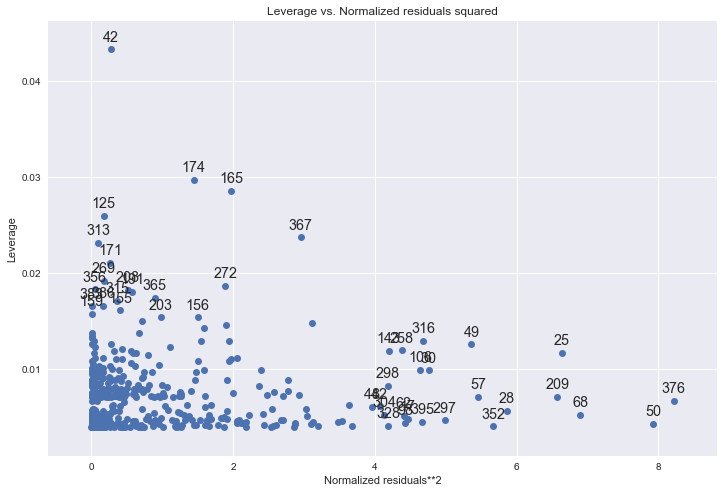

In [88]:
fig, ax = plt.subplots(figsize=(12,8))
stats.graphics.regressionplots.plot_leverage_resid2(mlm, ax=ax)
plt.show()

Some outliers, but mostly a high leverage point up there in 42.

## Exercise - Investigate the t-statistic for the null hypothesis. 

In this problem we will investigate the t-statistic for the null hypothesis
H: β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

    import numpy as np
    np.random.seed(1)
    x = np.random.randn(100)
    y = 2 * x + np.random.randn(100)

1. Perform a simple linear regression of y onto x, without an intercept.
Report the coefficient estimate β, the standard error of
this coefficient estimate, and the t-statistic and p-value associated
with the null hypothesis H: β = 0. Comment on these
results. (You can perform regression without an intercept)

2. Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H: β = 0. Comment on these results.

3. What is the relationship between the results obtained in (1) and
(2)?

4. For the regrssion of Y onto X without an intercept, the t-statistic for H0:β=0 takes the form β^/SE(β^), where β^ is given by (3.38), and where


$$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n(y_i - x_i\hat{\beta})^2}{(n - 1)\sum_{i=1}^nx_i^2}}$$

*Confirm numerically in Python, that the t-statistic can be written as*

$$\frac{\sqrt{n - 1}\sum_{i=1}^nx_iy_i}{\sqrt{(\sum_{i=1}^nx_i^2)(\sum_{i=1}^ny_i^2) - (\sum_{i=1}^nx_iy_i)}}$$

'5. Using the results from (4), argue that the t-statistic for the regression of y onto x is the same t-statistic for the regression of x onto y.

'6. In Python, show that when regression is performed with an intercept, the t-statistic for H0:β1=0 is the same for the regression of y onto x as it is the regression of x onto y.

In [89]:
import numpy as np
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

1) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate β^, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0. Comment on these results.

In [93]:
lr = smf.OLS(y, x).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           3.46e-36
Time:                        04:04:38   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

std err: 0.106 

t-statistic: 19.792

p-value: < 0.000 - high level of confidence in the correlation between the dependent and independent variables

2) Now perform a simple linear regression of x onto y, without an intercept. Report the coefficient estimate β^, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0. Comment on these results.

In [92]:
lr = smf.OLS(x, y).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           3.46e-36
Time:                        04:03:35   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

std err: 0.106 - 

t-statistic: 19.792

p-value: < 0.000 - high level of confidence in the correlation between the dependent and independent variables

3) What is the relationship between the results obtained in (1) and (2)?

x in relation to y is very similar to y in relation to x

4) For the regrssion of Y onto X without an intercept, the t-statistic for H0:β=0 takes the form β^/SE(β^), where β^ is given by (3.38), and where

$$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n(y_i - x_i\hat{\beta})^2}{(n - 1)\sum_{i=1}^nx_i^2}}$$

Show algebraically, and confirm numerically in Python, that the t-statistic can be written as 

$$\frac{\sqrt{n - 1}\sum_{i=1}^nx_iy_i}{\sqrt{(\sum_{i=1}^nx_i^2)(\sum_{i=1}^ny_i^2) - (\sum_{i=1}^nx_iy_i)}}$$

We have

$$t = \frac{\sum_ix_iy_y/\sum_jx_j^2}{\sqrt{\sum_i(y_i - x_i\hat{\beta})^2/(n - 1)\sum_jx_j^2}} = \frac{\sqrt{n - 1}\sum_ix_iy_i}{\sqrt{\sum_jx_j^2\sum_i(y_i - x_i\sum_jx_jy_j/\sum_jx_j^2)^2}} = \frac{\sqrt{n - 1}\sum_ix_iy_i}{\sqrt{(\sum_jx_j^2)(\sum_jy_j^2) - (\sum_jx_jy_j)^2}}$$

Now let’s verify this result numerically.

In [96]:
(np.sqrt(99) * sum(x*y))/np.sqrt(sum(x**2) * sum(y**2) - sum(x*y)**2)

19.791801987091272

5) Using the results from (4), argue that the t-statistic for the regression of y onto x is the same t-statistic for the regression of x onto y.

Formulaically, x and y are interchangeable. neither's position mattersfor the outcome.

6) In Python, show that when regression is performed with an intercept, the t-statistic for H0:β1=0 is the same for the regression of y onto x as it is the regression of x onto y.

In [103]:
from statsmodels.tools.tools import add_constant
test1 = smf.OLS(x, add_constant(y)).fit().tvalues[1]
test2 = smf.OLS(y, add_constant(x)).fit().tvalues[1]
print(test1, '\n',test2)

19.7825853156 
 19.7825853156


## Exercise - Explore linear regression without an intercept. 

1. Recall that the coefficient estimate β^ for the linear regression of Y onto X witout an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X ?

1. Generate an example in Python with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is different
from the coefficient estimate for the regression of Y onto X.

1. Generate an example in Python with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is the
same as the coefficient estimate for the regression of Y onto X.

1) Recall that the coefficient estimate β^ for the linear regression of Y onto X witout an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

The coefficient estimate for the regression of Y onto X is

$$\hat{\beta} = \frac{\sum_ix_iy_i}{\sum_jx_j^2}$$

The coefficient estimate for the regression of X onto Y is

$$\hat{\beta}' = \frac{\sum_ix_iy_i}{\sum_jy_j^2}$$

The coefficients are the same iff $\sum_jx_j^2 = \sum_jy_j^2$

2) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [108]:
import random
n = 100
x = random.randrange(0,100, n)
y = random.randrange(100,200, n)

3) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [ ]:
x = y

## Exercise - Explore linear regression with simulated data.

In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to set the seed prior to
starting part (1) to ensure consistent results.

1. Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X. 

2. Create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

3. Using x and eps, generate a vector y according to the model 

> Y = −1 + 0.5X + e

What is the length of the vector `y`? What are the values of β0 and β1 in this linear model?

4. Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.

5. Fit a least squares linear model to predict y using `x`. Comment
on the model obtained. How do β0 and β1 compare to β0 and
β1?

6. Display the least squares line on the scatterplot obtained in (4).
Draw the population regression line on the plot, in a different
color. Create an appropriate legend.

7. Now fit a polynomial regression model that predicts `y` using `x`
and `x^2`. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

8. Repeat (1)–(6) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term
`e` in (2). Describe your results.

9. Repeat (1)–(6) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term  in (b). Describe your results.

10. What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

1) Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X. 

In [432]:
np.random.seed(1)
x = np.random.randn(100)

2) Create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [433]:
eps = np.random.randn(100)*.25

3) Using x and eps, generate a vector y according to the model

    Y = −1 + 0.5X + e

What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [434]:
y = -1 + .5 * x + eps
len(y)

100

B0: -1; 

B1: 0.5

4) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

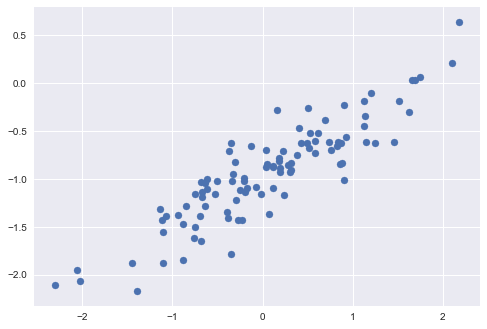

In [435]:
plt.scatter(x, y)
plt.show()

Looks pretty nice and linear, which makes sense, both are normal distributions 

5) Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do β^0 and β^1 compare to β0 and β1?

In [436]:
ls = smf.OLS(x, add_constant(y)).fit()
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           5.39e-36
Time:                        13:57:25   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4827      0.082     18.022      0.000       1.319       1.646
x1             1.5266      0.077     19.783      0.000       1.373       1.680
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

B0 is 1.48, so that's ok. standard error is also a little bit high.

6) Display the least squares line on the scatterplot obtained in (4). Draw the population regression line on the plot, in a different color. Use the legend() function to create an appropriate legend.

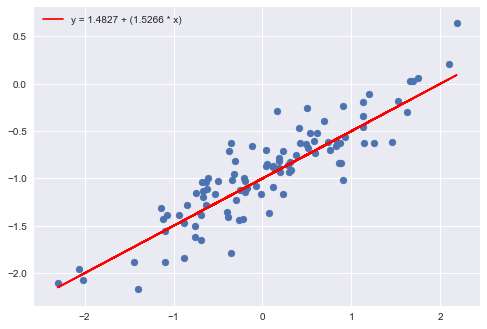

In [437]:
line_x = pd.DataFrame({'x': [x.min(), x.max()]})
line_y = ls.predict(line_x.x)
plt.plot(x, -1 + .5 * x, color='r', label='y = 1.4827 + (1.5266 * x)')
plt.scatter(x, y)
plt.legend()
plt.show()

7) Now fit a polynomial regression model that predicts y using x and $x^2$. Is there evidence that the quadratic term improves the model fit ? Explain your answer.

In [438]:
x2 = np.column_stack(( x, x**2))
prm = smf.OLS(y, add_constant(x2)).fit()
prm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.32e-34
Time:                        13:57:57   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9663      0.029    -33.486      0.000      -1.024      -0.909
x1             0.5234      0.027     19.582      0.000       0.470       0.576
x2             0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No evidence that it improves the measurement - the p-value of x^2 is quite high and the R squared remains the same. 

8) Repeat (1)-(6) after modifying the data generation process in such a way that there is less noise in the data. The initial model should remain the same. Describe your results.

Doing so by introducing less error:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1872.
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.14e-65
Time:                        13:58:02   Log-Likelihood:                 87.938
No. Observations:                 100   AIC:                            -171.9
Df Residuals:                      98   BIC:                            -166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9988      0.010    -98.222      0.0

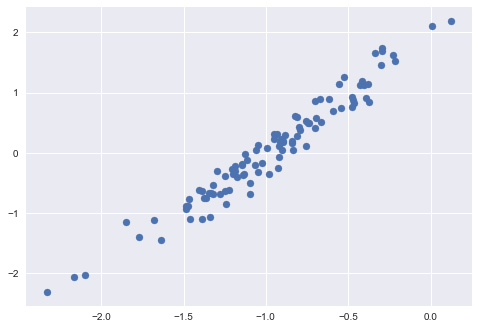

In [439]:
eps2 = np.random.randn(100) * 0.10
y = -1 + x * 0.5 + eps2
results = smf.OLS(y, add_constant(x)).fit()
print(results.summary())
plt.scatter(y, x)
plt.show()

Tighter fit and much higher R squared, and of course lower standard error. Higher t statistic though, which I feel is a little odd.

9) Repeat (1)-(6) after modifying the data generation process in such a way that there is more noise in the data. The initial model should remain the same. Describe your results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     60.60
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           7.29e-12
Time:                        13:58:09   Log-Likelihood:                -75.977
No. Observations:                 100   AIC:                             156.0
Df Residuals:                      98   BIC:                             161.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0494      0.052    -20.037      0.0

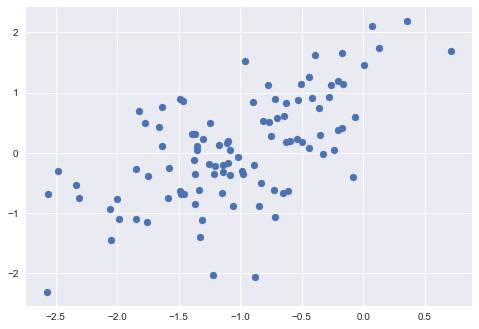

In [440]:
np.random.seed(2)
eps3 = np.random.randn(100) * 0.5
y = -1 + x * 0.5 + eps3
results = smf.OLS(y, add_constant(x)).fit()
print(results.summary())
plt.scatter(y, x)
plt.show()

Clearly much more spread, and much lower r-squared

In [172]:
results.params

array([-1.04941909,  0.45953507])

10) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set ? Comment on your results.

|   | B0: 0.025  | B0: 0.975  | B1: 0.025 | B1: 0.975 |
|---|---|---|---|---|
| Original  | 1.319  | 1.646 | 1.373 | 1.680 |
| Noisier  | -1.153  | -0.945  | 0.342 | 0.577 |
| Less noisy  |  -1.019 | -0.979 | 0.473 | 0.519 |

As the error increases, the confidence interval widens.

## Exercise - Explore the problem of collinearity.

Perform the following commands:

> np.random.seed(8)

> x1 = np.random.rand(100)

> x2 = .5 * x1 + np.random.rand(100) / 10

> y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)

1. The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefficients?

2. What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

3. Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are β0, β1, and β2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis Ho:β1 = 0? How about the null
hypothesis Ho:β2 = 0?

4. Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
Ho: β1 = 0?

5. Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
Ho: β1 = 0?

6. Do the results obtained in (3)–(5) contradict each other? Explain
your answer.

7. Now suppose we obtain one additional observation, which was unfortunately mismeasured.

> x1=c(x1 , 0.1)

> x2=c(x2 , 0.8)

> y=c(y,6)

Re-fit the linear models from (3) to (5) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

1) The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [171]:
np.random.seed(8)
x1 = np.random.rand(100)
x2 = .5 * x1 + np.random.rand(100) / 10
y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)

B0: 2

B1: 2

B2: 0.3

2) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

[[ 1.          0.98220892]
 [ 0.98220892  1.        ]]


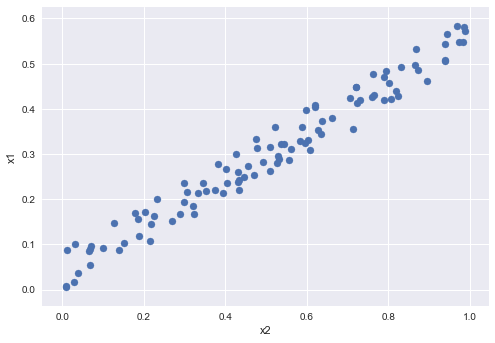

In [429]:
print(np.corrcoef(x1, x2))
plt.scatter(x1, x2)
plt.ylabel('x1')
plt.xlabel('x2')
plt.show()

Variables are highly correlated

3) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are β0, β1, and β2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis Ho:β1 = 0? How about the null hypothesis Ho:β2 = 0?

In [178]:
x_stack = np.column_stack((x1, x2))
results = smf.OLS(y, add_constant(x_stack)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     28.39
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           1.97e-10
Time:                        16:50:37   Log-Likelihood:                -141.05
No. Observations:                 100   AIC:                             288.1
Df Residuals:                      97   BIC:                             295.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9615      0.246      7.972      0.000       1.473       2.450
x1             5.9895      1.929      3.106      0.002       2.162       9.817
x2            -6.3538      3.608     -1.761      0.081     -13.514       0.806
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.034
Skew:                          -0.031   Prob(JB):                        0.983
Kurtosis:                       2.936   Cond. No.                         47.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

|   | True  | Fitted  |
|---|---|---|
| B0  | 2  | 1.9615  |
| B1  | 2  | 5.9895  |
| B2  |  0.3 | -6.3538 |

Can't reject any null hypotheses regarding B2, p-value > 0.05. Can reject B1; p-value < 0.05.

4) Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis H0:β1=0 ?

In [179]:
results = smf.OLS(y, add_constant(x1)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     52.54
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           9.79e-11
Time:                        16:58:05   Log-Likelihood:                -142.62
No. Observations:                 100   AIC:                             289.2
Df Residuals:                      98   BIC:                             294.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7327      0.211      8.204      0.000       1.314       2.152
x1             2.6533      0.366      7.249      0.000       1.927       3.380
==============================================================================
Omnibus:                        0.152   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.237
Skew:                          -0.089   Prob(JB):                        0.888
Kurtosis:                       2.841   Cond. No.                         4.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Can reject B0 and B1 null hypotheses based on this fit. Both p-values are less than 0.05.

5) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis Ho: β1 = 0?

In [180]:
results = smf.OLS(y, add_constant(x2)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     43.31
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           2.32e-09
Time:                        17:01:15   Log-Likelihood:                -145.79
No. Observations:                 100   AIC:                             295.6
Df Residuals:                      98   BIC:                             300.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6721      0.238      7.039      0.000       1.201       2.144
x1             4.6508      0.707      6.581      0.000       3.248       6.053
==============================================================================
Omnibus:                        0.439   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.589
Skew:                          -0.125   Prob(JB):                        0.745
Kurtosis:                       2.720   Cond. No.                         7.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Can reject B0 and B1 null hypotheses based on this fit. Both p-values are less than 0.05.

6) Do the results obtained in (3)–(5) contradict each other? Explain your answer.

No, just means that the best fit for the data is that of colinearity rather than a multiple regression model.

## Exercise - Predict per capita crime rate. 

This problem involves the `Boston` data set. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

1. For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

2. Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H: β = 0?

2. How do your results from (1) compare to your results from (2)?
Create a plot displaying the univariate regression coefficients
from (1) on the x-axis, and the multiple regression coefficients
from (2) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

3. Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = β0 + β1X + β2X^2 + β3X^3 + E.

In [181]:
boston = pd.read_csv('Boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [183]:
boston.drop('Unnamed: 0', axis=1, inplace=True)

1) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [416]:
df1 = pd.DataFrame(columns=["pvals", "coeff", "conf_lower", "conf_higher"])
for col in boston.columns[1:]:
    single_regression_formula = 'crim ~ {}'.format(col)
    results1 = smf.ols(single_regression_formula, data=boston).fit()
    print(results1.summary())
    df1 = df1.append(results_summary_to_dataframe(results1))

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           5.51e-06
Time:                        13:47:40   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           2.36e-47
Time:                        13:47:40   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5284      0.816    -10.454      0.0

In [427]:
print('The predictors that have a statistically significant \
association between the predictor and the reponse are: \n{}'.format(', '.join(list(df1[df1.pvals < 0.05].index))))

The predictors that have a statistically significant association between the predictor and the reponse are: 
zn, indus, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv


2) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H: β = 0?

In [318]:
combos = 'crim ~ ' + ' + '.join(boston.columns[1:])
results2 = smf.ols(combos, data=boston).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           1.57e-56
Time:                        18:28:17   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [411]:
def results_summary_to_dataframe(results):
    '''This takes the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues.iloc[1:]
    coeff = results.params.iloc[1:]
    std_err = results.bse.iloc[1:]
    r_squared = results.rsquared
    conf_lower = results.conf_int().iloc[1:][0]
    conf_higher = results.conf_int().iloc[1:][1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "r-squared":r_squared,
                               "std_err":std_err,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    # Reordering
    results_df = results_df[["r-squared", "coeff", "std_err", "pvals", "conf_lower", "conf_higher"]]
    return results_df

The predictors for whom we can reject the null hypothesis are (predictors that have p-values less than 0.05):

In [358]:
df2 = results_summary_to_dataframe(results2)
list(df2[df2.pvals < 0.05].index)

['Intercept', 'zn', 'dis', 'rad', 'black', 'medv']

3) How do your results from (1) compare to your results from (2)? Create a plot displaying the univariate regression coefficients from (1) on the x-axis, and the multiple regression coefficients from (2) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [367]:
df1 = df1[df1.index != ('Intercept' and 'crim')].sort_index()
df2 = df2[df2.index != ('Intercept' and 'crim')].sort_index()

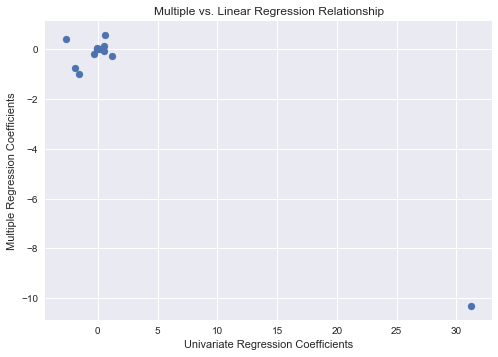

In [392]:
plt.scatter(df1.coeff, df2.coeff)
plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title('Multiple vs. Linear Regression Relationship')
plt.show()

3) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form $Y = β0 + β1X + β2X^2 + β3X^3 + E$.

In [414]:
df3 = pd.DataFrame(columns=["r-squared", "coeff", "std_err", "pvals", "conf_lower", "conf_higher"])

for x in boston.columns[1:]:
    results = smf.ols(f'crim ~ {x} + np.power({x}, 2) + np.power({x}, 3)', data=boston).fit()
    df3 = df3.append(results_summary_to_dataframe(results))
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.28e-06
Time:                        13:46:48   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433     

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           2.31e-55
Time:                        13:46:48   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6055      2.050  

Of all those models, these are the statistically significant variables:

In [391]:
df3 = df3[df3.index != 'Intercept']
df3[df3.pvals < 0.05].sort_values('pvals')

,r-squared,coeff,std_err,pvals,conf_lower,conf_higher
medv,0.420200,-5.094831,0.433832,2.637707e-28,-5.947181,-4.242480
"np.power(medv, 2)",0.420200,0.155496,0.017190,3.260523e-18,0.121722,0.189271
dis,0.277825,-15.554353,1.735967,6.374792e-18,-18.965010,-12.143697
"np.power(nox, 3)",0.296978,-1245.702874,149.281640,6.961110e-16,-1538.996638,-952.409110
"np.power(nox, 2)",0.296978,2248.544053,279.899273,6.811300e-15,1698.625715,2798.462391
nox,0.296978,-1279.371252,170.397473,2.758372e-13,-1614.151311,-944.591192
"np.power(medv, 3)",0.420200,-0.001490,0.000204,1.046510e-12,-0.001890,-0.001090
"np.power(indus, 3)",0.259658,-0.006976,0.000957,1.196405e-12,-0.008856,-0.005096
"np.power(dis, 2)",0.277825,2.452072,0.346419,4.941214e-12,1.771462,3.132683
"np.power(indus, 2)",0.259658,0.251937,0.039322,3.420187e-10,0.174681,0.329194


So it would seem that there are significant non-linear responses for the medv, nox, indus, dis, ptratio, and age vairables.